In [1]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append("/home/lorena/Documents/Lorena_Thesis/Causal_CNN/")

from libs.network_analysis import evaluation

In [3]:
sns.set_style("whitegrid")#, {"axes.facecolor": ".9"})
sns.set_context("paper")

In [4]:
my_path = './Results/Results_sincerities/'
save_path = './Results/Results_sincerities/summary/'

In [5]:
links_curated={}
links_synthetic={}
for el in os.listdir(my_path):
    complete_path = os.path.join(my_path, el)
    if os.path.isfile(complete_path):
        if el[:3]=='dyn':
            links_synthetic[el] = pd.read_csv(complete_path)
        else:
            links_curated[el] = pd.read_csv(complete_path)

## Synthetic

In [6]:
base_path = './beeline_data/synthetic/'
refs = {}

for folder in os.listdir(base_path):
    temp_path = os.path.join(base_path, folder)
    for fol in os.listdir(temp_path):
        refs[fol] = pd.read_csv(temp_path + '/' + fol + '/refNetwork.csv') #ground truth

In [7]:
metrics_df = pd.DataFrame()

for el in links_synthetic:
    tfs = links_synthetic[el]['SourceGENES'].unique()
    genes = links_synthetic[el]['TargetGENES'].unique()
    num_links = np.where(refs[el]['Gene1'] == refs[el]['Gene2'], 0, 1).sum()
    links_temp = pd.DataFrame({'TF': links_synthetic[el]['SourceGENES'],
                               'importance': links_synthetic[el]['Interaction'],
                               'target': links_synthetic[el]['TargetGENES']})
    metrics_df = metrics_df.append(evaluation(links_temp[:num_links], refs[el], tfs, genes))

#metrics_df.index = links.keys()

In [8]:
metrics_df.index = links_synthetic.keys()

In [9]:
metrics_df.columns = ['fscore', 'AUPRC', 'AUROC']

In [10]:
metrics_df['data'] = [el.split(sep='-')[1] for el in metrics_df.index]

Text(0.5, 1.0, 'Curated Datasets F-score')

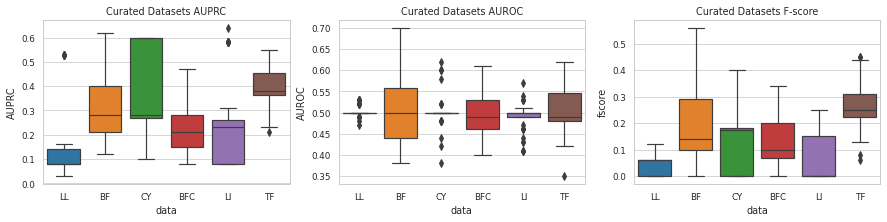

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(data=metrics_df, x="data", y="AUPRC", ax=axs[0])
axs[0].set_title('Curated Datasets AUPRC')
sns.boxplot(data=metrics_df, x="data", y="AUROC", ax=axs[1])
axs[1].set_title('Curated Datasets AUROC')
sns.boxplot(data=metrics_df, x="data", y="fscore", ax=axs[2])
axs[2].set_title('Curated Datasets F-score')

In [12]:
metrics_df.to_csv(save_path + 'synthetic.csv')

## Curated

In [13]:
base_path = './beeline_data/curated/'
refs = {}

for folder in os.listdir(base_path):
    temp_path = os.path.join(base_path, folder)
    for fol in os.listdir(temp_path):
        refs[fol] = pd.read_csv(temp_path + '/' + fol + '/refNetwork.csv') #ground truth

In [14]:
metrics_df = pd.DataFrame()

for el in links_curated:
    tfs = links_curated[el]['SourceGENES'].unique()
    genes = links_curated[el]['TargetGENES'].unique()
    num_links = np.where(refs[el]['Gene1'] == refs[el]['Gene2'], 0, 1).sum()
    links_temp = pd.DataFrame({'TF': links_curated[el]['SourceGENES'],
                               'importance': links_curated[el]['Interaction'],
                               'target': links_curated[el]['TargetGENES']})
    metrics_df = metrics_df.append(evaluation(links_temp[:num_links], refs[el], tfs, genes))

#metrics_df.index = links.keys()

In [15]:
metrics_df.index = links_curated.keys()

In [16]:
metrics_df.columns = ['fscore', 'AUPRC', 'AUROC']

In [17]:
metrics_df['data'] = [el.split(sep='-')[0] for el in metrics_df.index]

Text(0.5, 1.0, 'Curated Datasets F-score')

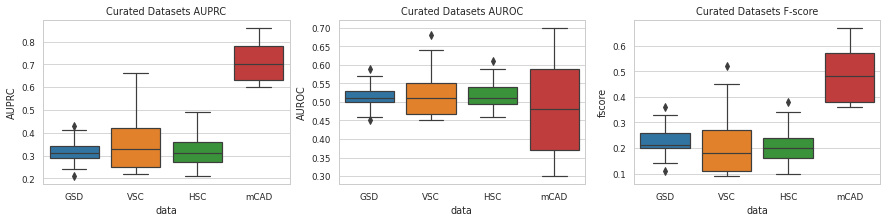

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15,3))

sns.boxplot(data=metrics_df, x="data", y="AUPRC", ax=axs[0])
axs[0].set_title('Curated Datasets AUPRC')
sns.boxplot(data=metrics_df, x="data", y="AUROC", ax=axs[1])
axs[1].set_title('Curated Datasets AUROC')
sns.boxplot(data=metrics_df, x="data", y="fscore", ax=axs[2])
axs[2].set_title('Curated Datasets F-score')

In [19]:
metrics_df.to_csv(save_path + 'curated.csv')